# lms 1

In [ ]:
!pip install playsound

In [ ]:
from playsound import playsound

playsound('/content/harvard.wav')

In [ ]:
!pip install pygobject

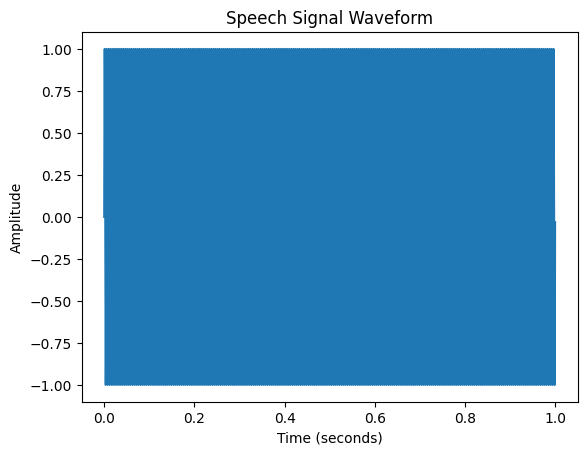

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Sample rate (number of samples per second)
sample_rate = 44100

# Time values in seconds
time = np.arange(0, 1, 1/sample_rate)

# Frequency of the speech signal (e.g., 440 Hz for an 'A' sound)
frequency = 220

# Generate the speech signal (a sine wave in this case)
speech_signal = np.sin(2 * np.pi * frequency * time)
fig, ax = plt.subplots()

# Plot the speech signal waveform
ax.plot(time, speech_signal)

# Set labels for the axes and the title for the plot
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Amplitude')
ax.set_title('Speech Signal Waveform')

# Show the plot
plt.show()

In [ ]:
pip install numpy matplotlib

In [ ]:
pip install scipy numpy

<ipython-input-10-02db3e16d3e0>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wav.read('/content/harvard.wav')


the sample rate is  44100


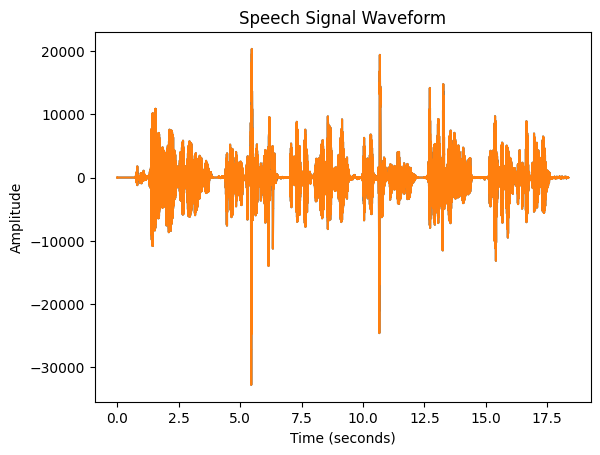

In [10]:
import scipy.io.wavfile as wav
import numpy as np
sample_rate, audio_data = wav.read('/content/harvard.wav')

print('the sample rate is ', sample_rate)
import matplotlib.pyplot as plt

# Time values in seconds
time = np.arange(len(audio_data)) / sample_rate //44100

# Create the figure and axes for the plot
fig, ax = plt.subplots()

# Plot the speech signal waveform
ax.plot(time, audio_data)

# Set labels for the axes and the title for the plot
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Amplitude')
ax.set_title('Speech Signal Waveform')

# Show the plot
plt.show()

In [ ]:
pip install librosa matplotlib

In [12]:
import librosa
import matplotlib.pyplot as plt

In [17]:
audio_path = '/content/harvard.wav'
# y, sr = librosa.load(audio_path)
y, sr = librosa.load(audio_path, sr=44100, mono=False)

In [18]:
rms = librosa.feature.rms(y=y)

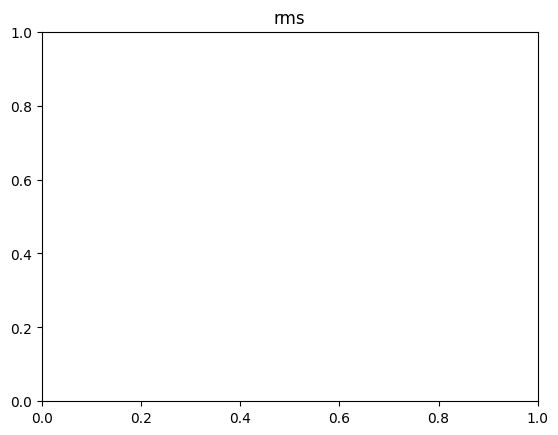

In [19]:
plt.title('rms')
plt.show()

In [20]:
zcr = librosa.feature.zero_crossing_rate(y=y)
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
rms = librosa.feature.rms(y=y)

ValueError: ignored

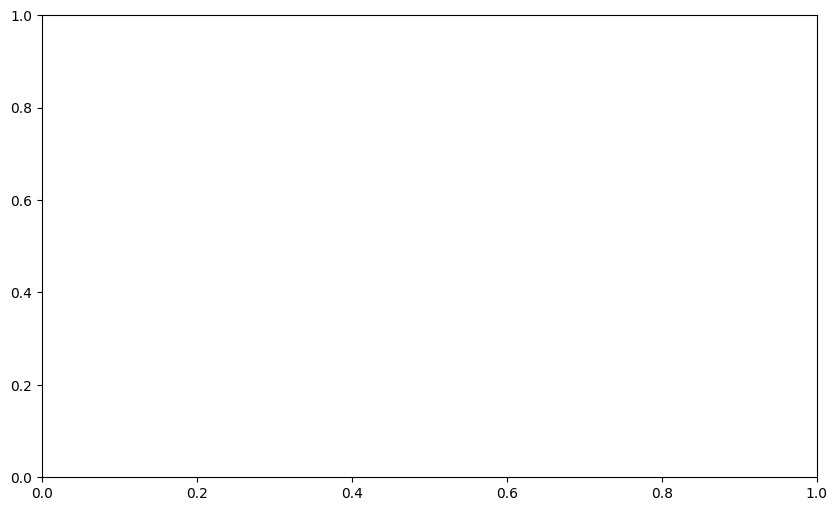

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
librosa.display.specshow(contrast, x_axis='time', sr=sr)
plt.colorbar()
plt.title('contrast')
plt.show()

In [ ]:
print("RMS Energy:", rms)
print("Zero Crossing Rate:", zcr)
print("Spectral Centroid:", centroid)
print("Spectral Bandwidth:", bandwidth)
print("Spectral Contrast:", contrast)
print("Chroma Features:", chroma)

# link shared in lab:

https://rramnauth2220.github.io/blog/posts/code/200525-feature-extraction.html#zcr

In [1]:
!pip install essentia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 12.0 MB/s eta 0:00:00


In [2]:
%matplotlib inline
import librosa                     # librosa music package
import essentia                    # essentia music package
import essentia.standard           # essentia for imperative programming
import essentia.streaming          # essentia for declarative programming

import IPython                     # for playing audio
import numpy as np                 # for handling large arrays
import pandas as pd                # for data manipulation and analysis
import scipy                       # for common math functions
import sklearn                     # a machine learning library
import os                          # for accessing local files

import librosa.display             # librosa plot functions
import matplotlib.pyplot as plt    # plotting with Matlab functionality
import seaborn as sns              # data visualization based on matplotlib

In [3]:
# in libROSA
audio_librosa = '/content/harvard.wav' # audio file path
y, sr = librosa.core.load(audio_librosa) # load samples and determine sampling rate

<ipython-input-3-665a522ed3fb>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.core.load(audio_librosa) # load samples and determine sampling rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: ignored

In [ ]:
# in Essentia
loader = essentia.standard.MonoLoader(filename='/content/harvard.wav') # instantiate audio loader
audio_essentia = loader() # actually load audio file

In [ ]:
# to hear how the audio we want to process sounds like
IPython.display.Audio('/content/harvard.wav')

In [ ]:
plt.rcParams['figure.figsize'] = (15, 6) # instantiate plot canvas
plt.plot(audio_librosa[1*44100:2*44100]) # get the 2nd second of the audio clip
plt.show()

In [ ]:
w_essentia = Windowing(type = 'hann')    # specify window function in essentia
w_scipy = signal.get_window('triang', 7) # apply window function in scipy
w_librosa= signal.get_window('hamm', 7)  # apply window function in librosa

In [ ]:
# SETUP
w = Windowing(type = 'hann')    # state windowing function
spectrum = Spectrum()           # instead of a complex FTT (the output of FFT()), we just want the magnitude spectrum
zcr = ZeroCrossingRate()        # instantiate the essentia.standard zero-crossing function

zcrs = []
frameSize = 1024
hopSize = 512

In [ ]:
# APPLY ZCR FUNCTION to SPEECH signal

# iterating through frames matlab style:
# for fstart in range(0, len(audio)-frameSize, hopSize):
#   frame = audio[fstart:fstart+frameSize]

# iterating through frames essentia style:
for frame in FrameGenerator(audio, frameSize=1024, hopSize=512, startFromZero=True):
    zcrs.append(zcr(spectrum(w(frame))))

zcrs = essentia.array(zcrs).T # shape output array

In [ ]:
# PLOT OUTPUT
zcrs_x = range(0, len(zcrs))
zcrs_y = zcrs
plt.plot(zcrs_x, zcrs_y, 'o', color='black') # plot ZCR per frame as points
plt.plot(zcrs) # plot time-series change in ZCRs
show()

In [ ]:
# APPLY LibROSA ZCR FUNCTION to MUSIC signal
zcr = librosa.feature.zero_crossing_rate(y)

# PLOT OUTPUT
plt.figure(figsize=(15,5))
plt.semilogy(zcr.T, label='Fraction') # apply log transform on y
plt.ylabel('Fraction per Frame')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

In [ ]:
def calculateSTE(audio_signal, window_type, frame_length, hop_size):
    signal_new = []                           # container for signal square
    win = Windowing(type = window_type)       # instantiate window function

    # compute signal square by frame
    for frame in FrameGenerator(audio_signal, frameSize=frame_length, hopSize=hop_size, startFromZero=True):
        frame_new = frame**2
        signal_new.append(frame_new)

    # output the convolution of window and signal square
    return np.convolve(signal_new, win)

In [ ]:
hop_length = 256
frame_length = 512

# compute sum of signal square by frame
energy = np.array([
    sum(abs(y[i:i+frame_length]**2))
    for i in range(0, len(y), hop_length)
])
energy.shape

# compute RMSE over frames
rmse = librosa.feature.rms(y, frame_length=frame_length, hop_length=hop_length, center=True)
rmse.shape
rmse = rmse[0]
# plot energy and rmse along the waveform
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15, 5))
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, energy/energy.max(), 'r--')                # normalized for visualization
plt.plot(t[:len(rmse)], rmse/rmse.max(), color='blue') # normalized for visualization
plt.legend(('Energy', 'RMSE'))

In [ ]:
S, phase = librosa.magphase(librosa.stft(y)) # compute magnitude and phase content
rms = librosa.feature.rms(S=S) # compute root-mean-square for each frame in magnitude

plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy', color="black")
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                            y_axis='log', x_axis='time')
plt.title('log power spectrogram')

In [ ]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

plt.figure(figsize=(15, 5))
librosa.display.waveplot(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveplot(y_percussive, sr=sr, color='red', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.show()

In [ ]:
# showing differences in STFT representations
y, sr = librosa.load(librosa.util.example_audio_file(), duration=15)
D = librosa.stft(y)
H, P = librosa.decompose.hpss(D)

plt.figure(figsize=(15, 7))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Full power spectrogram: Harmonic + Percussive')

# harmonic spectrogram will show more horizontal/pitch-dependent changes
plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Harmonic power spectrogram')
plt.subplot(3, 1, 3)

# percussive spectrogram will show more vertical/time-dependent changes
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Percussive power spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
tempo, beat_frames = librosa.beat.beat_track(y=y_harmonic, sr=sr)

print('Detected Tempo: '+ str(tempo) + ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff = np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g = sns.barplot(beat_nums, beat_time_diff, palette="rocket",ax=ax)
g = g.set(xticklabels=[])

#lms 2